In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

import cv2

from sklearn.feature_selection import SelectFromModel

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/6025 - Final Project/airbnb_listings_austin.csv')
# airbnb = pd.read_csv('/Users/helenas/Desktop/Predictive Analytics/Homework/Final Project/airbnb_listings_austin.csv')
airbnb.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict


# Questions
1. Is it okay to fill Review_Ratings if 35% of values are missing?
2. "How important are guest reviews and ratings?" - Important to the price?
3. Can we assume missing values are 0?

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5835 non-null   int64  
 1   listing_url                  5835 non-null   object 
 2   name                         5835 non-null   object 
 3   summary                      5373 non-null   object 
 4   space                        4475 non-null   object 
 5   description                  5832 non-null   object 
 6   experiences_offered          5835 non-null   object 
 7   neighborhood_overview        3572 non-null   object 
 8   notes                        2412 non-null   object 
 9   transit                      3492 non-null   object 
 10  host_id                      5835 non-null   int64  
 11  host_name                    5820 non-null   object 
 12  host_since                   5820 non-null   object 
 13  host_location     

# Let's take a look at the null values.
### We are particularly interested in columns with >20% missing values as we will most likely need to drop those

In [ ]:
missing_pct = airbnb.isna().sum()/airbnb.shape[0]
missing_df = pd.DataFrame(missing_pct).reset_index()
missing_df.columns = ['column_name', 'missing_pct']

missing_df[missing_df['missing_pct']>.2]

,column_name,missing_pct
4,space,0.233076
7,neighborhood_overview,0.387832
8,notes,0.586632
9,transit,0.401542
14,host_about,0.318937
15,host_response_time,0.284147
16,host_response_rate,0.284147
31,square_feet,0.948243
33,weekly_price,0.618338
34,security_deposit,0.525278


## These columns have <20% missing values but >0. We will need to fill these columns if we decide they might be useful in our model.

In [ ]:
missing_df[(missing_df['missing_pct']<=0.2) & (missing_df['missing_pct']!=0)]

,column_name,missing_pct
3,summary,0.079177
5,description,0.000514
11,host_name,0.002571
12,host_since,0.002571
13,host_location,0.004284
17,host_is_superhost,0.002571
18,host_listings_count,0.002571
19,host_has_profile_pic,0.002571
20,host_identity_verified,0.002571
21,neighbourhood,0.177378


# Create Additional Columns of Interest
There are four additional columns we will create that we felt might give important insights.
* filled: (int) counts how many text columns are filled out of the total 8. We thought listings with more informations may lead to a higher booking rate.
* mostly_filled: (binary)  True if 'filled' >= 5; False if 'filled' < 5

* availability_90_pct: percentage of next 90 days that the property is available
* booked: (binary) 1 if availability_90_pct is less than .4, 0 if greater
* neighborhood_2:

### Create 'availability_90_pct' column by dividing 'availability_90' by 90

In [ ]:
airbnb['availability_90_pct'] = airbnb['availability_90'] / 90
airbnb[['availability_90','availability_90_pct']]

,availability_90,availability_90_pct
0,0,0.000000
1,89,0.988889
2,90,1.000000
3,90,1.000000
4,87,0.966667
...,...,...
5830,65,0.722222
5831,62,0.688889
5832,89,0.988889
5833,90,1.000000


### Create 'booked' column. 1 if 'availability_90_pct' < .4, 0 if >= .4

In [ ]:
airbnb['booked'] = airbnb['availability_90_pct'].apply(lambda x: 1 if x < .4 else 0)
airbnb[['availability_90', 'availability_90_pct', 'booked']]

,availability_90,availability_90_pct,booked
0,0,0.000000,1
1,89,0.988889,0
2,90,1.000000,0
3,90,1.000000,0
4,87,0.966667,0
...,...,...,...
5830,65,0.722222,0
5831,62,0.688889,0
5832,89,0.988889,0
5833,90,1.000000,0


### Create 'filled' and 'mostly_filled' column
This will look at the 8 description columns and return how many are filled and is it mostly filled
- 1 (mostly filled): 5 or more fields filled
- 0 (mostly blank): less than 5 fields filled

In [ ]:
descriptions = airbnb[['summary', 'space', 'description','neighborhood_overview', 'notes', 'transit', 'host_about', 'amenities']].copy()
descriptions['filled'] = descriptions.apply(lambda x: x.count(), axis = 1)
airbnb = pd.merge(airbnb, descriptions['filled'], right_index = True, left_index=True)


airbnb['mostly_filled'] = airbnb['filled'].apply(lambda x:1 if x>4 else 0)
airbnb.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,availability_90_pct,booked,filled,mostly_filled
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,10.0,10.0,10.0,10.0,f,moderate,0.000000,1,7,1
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,NaN,NaN,NaN,NaN,f,moderate,0.988889,0,7,1
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,flexible,1.000000,0,4,0
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,flexible,1.000000,0,4,0
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,NaN,NaN,NaN,NaN,f,strict,0.966667,0,5,1


In [ ]:
airbnb['mostly_filled'].value_counts()

1    4258
0    1577
Name: mostly_filled, dtype: int64

# Drop Unnecessary Columns

Need to create the description filled column before dropping

List of columns dropped

In [ ]:
airbnb.drop(columns=['id', 'listing_url', 'name', 'summary', 'experiences_offered', 'neighborhood_overview', 'neighbourhood', 'notes', 'transit', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_rate', 'host_response_time', 'host_about', 'city', 'square_feet', 'weekly_price', 'has_availability', 'instant_bookable', 'space', 'description'], inplace = True)

# Impute Missing Values
We decided to drop the summary, host_name, host_since, and host_location as these columns are either not useful or redundant (summary is very similar to description).

- host_is_superhost will be filled with f (No)
- host_listing_count will be filled with median (1)
- host_has_profile_pic will be filled with f (No)
- host_identity_verified will be filled with f (No)
- bathrooms will be filled with median (1)
- bedrooms will be filled with median (1)
- beds will be filled with median (2)

In [ ]:
airbnb['host_is_superhost'].fillna('f', inplace = True)

airbnb['host_listings_count'].fillna(1, inplace = True)

airbnb['host_has_profile_pic'].fillna('f', inplace = True)

airbnb['host_identity_verified'].fillna('f', inplace = True)

airbnb['bathrooms'].fillna(1, inplace = True)

airbnb['bedrooms'].fillna(1, inplace = True)

airbnb['beds'].fillna(2, inplace = True)

In [ ]:
airbnb['security_deposit'].fillna(0, inplace = True)

airbnb['cleaning_fee'].fillna(0, inplace = True)

In [ ]:
airbnb.isna().sum() / airbnb.shape[0]

host_is_superhost              0.000000
host_listings_count            0.000000
host_has_profile_pic           0.000000
host_identity_verified         0.000000
property_type                  0.000000
room_type                      0.000000
accommodates                   0.000000
bathrooms                      0.000000
bedrooms                       0.000000
beds                           0.000000
bed_type                       0.000000
amenities                      0.000000
price                          0.000000
security_deposit               0.000000
cleaning_fee                   0.000000
guests_included                0.000000
extra_people                   0.000000
minimum_nights                 0.000000
availability_30                0.000000
availability_60                0.000000
availability_90                0.000000
availability_365               0.000000
number_of_reviews              0.000000
review_scores_rating           0.350643
review_scores_accuracy         0.352871


In [ ]:
airbnb.dtypes

host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                           object
security_deposit                object
cleaning_fee                    object
guests_included                  int64
extra_people                    object
minimum_nights                   int64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness

In [ ]:
airbnb['extra_people'] = airbnb['extra_people'].str.replace('$', '').astype('float')

In [ ]:
airbnb['property_type'] = airbnb['property_type'].astype('category')
airbnb['room_type'] = airbnb['room_type'].astype('category')
airbnb['bed_type'] = airbnb['bed_type'].astype('category')
airbnb['cancellation_policy'] = airbnb['cancellation_policy'].astype('category')

In [ ]:
airbnb['booked'] = airbnb['booked'].astype('bool')

airbnb['host_is_superhost'] = airbnb['host_is_superhost'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].astype('bool')

airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].astype('bool')

airbnb['host_identity_verified'] = airbnb['host_identity_verified'].apply(lambda x: 0 if x == 'f' else 1)
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].astype('bool')

In [ ]:
airbnb['security_deposit'] = airbnb['security_deposit'].str.replace('$', '')
airbnb['security_deposit'] = airbnb['security_deposit'].str.replace(',', '')
airbnb['security_deposit'] = airbnb['security_deposit'].str.strip('.00 ')
airbnb['security_deposit'] = airbnb['security_deposit'].astype('float')

In [ ]:
airbnb['cleaning_fee'] = airbnb['cleaning_fee'].str.replace('$', '').str.strip('.00 ').astype('float')

In [ ]:
airbnb['price'] = airbnb['price'].str.replace('$', '').str.replace(',', '').astype('float')

# Exploratory Analysis


---

Are there any factors we can recommend for our client to boost his ratings?

First we will group listings into 2 categories: those with scores below 90 and above 90.

In [ ]:
# First make a copy where the reviews are not missing
review_df = airbnb[airbnb['review_scores_rating'].notnull()]

In [ ]:
review_df['below_90'] = review_df['review_scores_rating'].apply(lambda x: True if x < 90 else False)

In [ ]:
review_df.groupby('below_90')['price'].mean()

below_90
False    227.030719
True     208.639908
Name: price, dtype: float64

In [ ]:
review_df.groupby('below_90')['booked'].value_counts(normalize=True)

below_90  booked
False     False     0.735759
          True      0.264241
True      False     0.733945
          True      0.266055
Name: booked, dtype: float64

In [ ]:
review_df.groupby('below_90')['bedrooms'].mean()

below_90
False    1.712795
True     1.665138
Name: bedrooms, dtype: float64

In [ ]:
review_df.groupby('below_90')['bathrooms'].mean()

below_90
False    1.440799
True     1.372706
Name: bathrooms, dtype: float64

In [ ]:
review_df.groupby('below_90')['cancellation_policy'].value_counts(normalize=True)

below_90  cancellation_policy
False     strict                 0.482255
          moderate               0.266329
          flexible               0.248732
          super_strict_30        0.002684
          no_refunds             0.000000
True      strict                 0.456422
          flexible               0.316514
          moderate               0.224771
          no_refunds             0.002294
          super_strict_30        0.000000
Name: cancellation_policy, dtype: float64

In [ ]:
review_df.groupby('below_90')['room_type'].value_counts(normalize=True)

below_90  room_type      
False     Entire home/apt    0.718759
          Private room       0.263048
          Shared room        0.018193
True      Entire home/apt    0.665138
          Private room       0.300459
          Shared room        0.034404
Name: room_type, dtype: float64

# Now we well look specifically at the overall rating score and see if there is anything that affects it

## Begin with Correlation Heat map

In [ ]:
num_df = airbnb.select_dtypes(include=np.number)

num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_listings_count          5835 non-null   float64
 1   accommodates                 5835 non-null   int64  
 2   bathrooms                    5835 non-null   float64
 3   bedrooms                     5835 non-null   float64
 4   beds                         5835 non-null   float64
 5   price                        5835 non-null   float64
 6   security_deposit             2770 non-null   float64
 7   cleaning_fee                 3587 non-null   float64
 8   guests_included              5835 non-null   int64  
 9   extra_people                 5835 non-null   float64
 10  minimum_nights               5835 non-null   int64  
 11  availability_30              5835 non-null   int64  
 12  availability_60              5835 non-null   int64  
 13  availability_90   

## Decided to drop some redundant variables

In [ ]:
num_df.drop(columns=['filled', 'mostly_filled', 'availability_30', 'availability_60', 'availability_365', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'availability_90_pct'], inplace = True)
num_df.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_90,number_of_reviews,review_scores_rating
count,5835.000000,5835.000000,5835.000000,5835.000000,5835.000000,5835.000000,2770.000000,3587.000000,5835.000000,5835.000000,5835.000000,5835.000000,5835.000000,3789.000000
mean,11.739332,4.388175,1.475835,1.737961,2.211482,286.182177,19.959928,30.299136,1.880548,13.585775,2.101799,56.712939,10.794687,95.435735
std,55.089746,2.689056,0.772735,1.136422,1.647815,403.231943,70.727460,43.574817,1.773406,29.638225,5.584971,35.542372,25.405596,7.260422
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,95.000000,2.000000,3.000000,1.000000,0.000000,1.000000,21.000000,0.000000,93.000000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,175.000000,5.000000,9.000000,1.000000,0.000000,2.000000,73.000000,2.000000,98.000000
75%,2.000000,6.000000,2.000000,2.000000,3.000000,325.000000,15.000000,35.000000,2.000000,20.000000,2.000000,89.000000,9.000000,100.000000
max,339.000000,16.000000,8.000000,10.000000,16.000000,10000.000000,1899.000000,385.000000,16.000000,500.000000,365.000000,90.000000,314.000000,100.000000


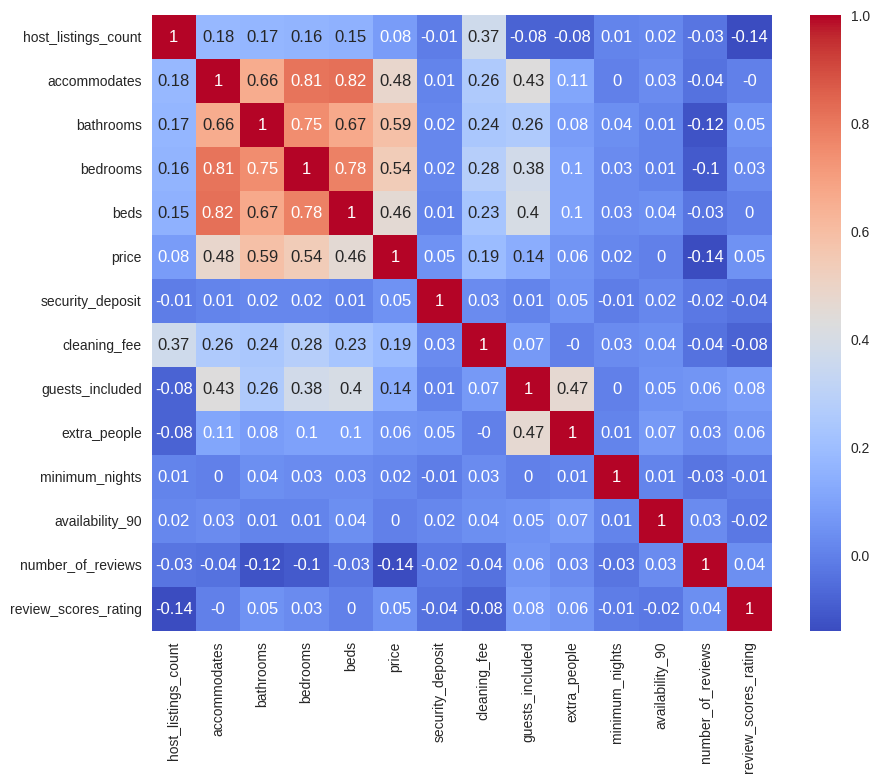

In [ ]:
# Compute correlations
cormat = num_df.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

# Ratings vs Price

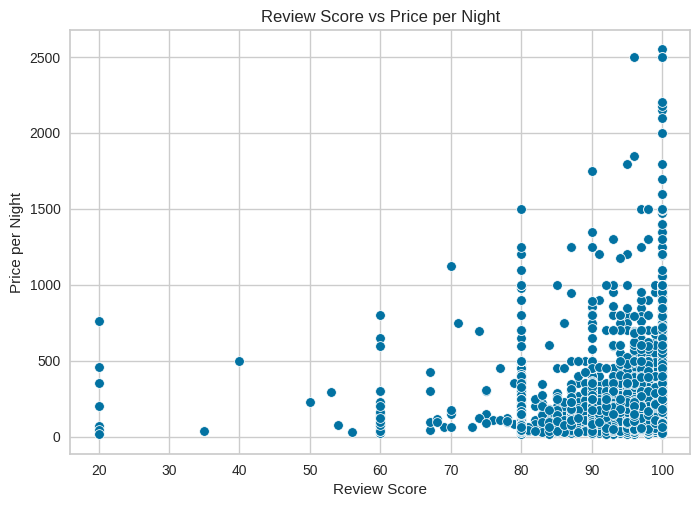

In [ ]:
sns.scatterplot(data = airbnb, y = 'price', x = 'review_scores_rating')
plt.title('Review Score vs Price per Night')
plt.xlabel('Review Score')
plt.ylabel('Price per Night')
plt.show()

In [ ]:
airbnb.groupby('booked')['review_scores_rating'].mean()

booked
False    95.376390
True     95.600798
Name: review_scores_rating, dtype: float64

Text(0.5, 1.0, 'Average Review Score by Booked Status')

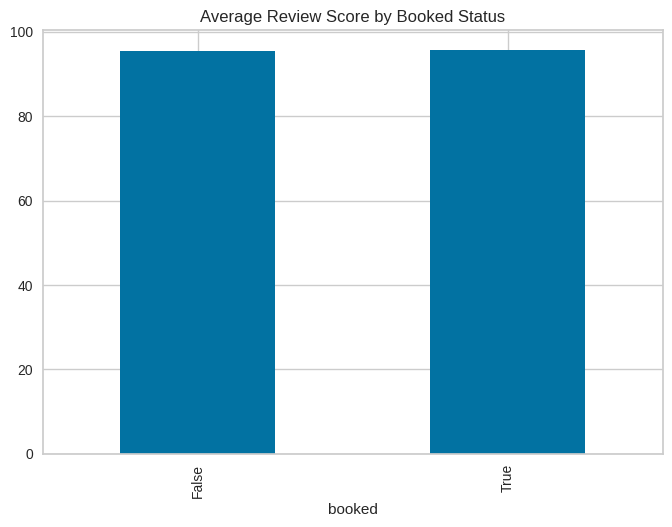

In [ ]:
airbnb.groupby('booked')['review_scores_rating'].mean().plot(kind='bar')
plt.title('Average Review Score by Booked Status')

# Review Score and Booked

Booked = 60% or greater occupancy in the next 90 days


# Superhost

In [ ]:
airbnb.groupby('host_is_superhost')['review_scores_rating'].mean()

host_is_superhost
False    94.912814
True     97.516426
Name: review_scores_rating, dtype: float64

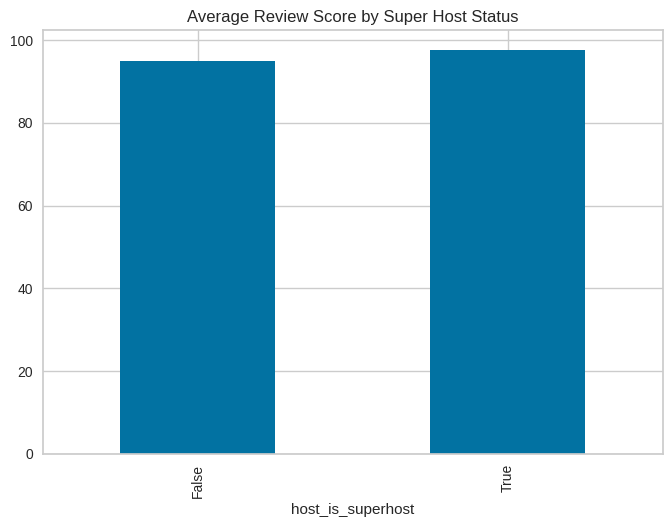

In [ ]:
airbnb.groupby('host_is_superhost')['review_scores_rating'].mean().plot(kind='bar')
plt.title('Average Review Score by Super Host Status')
plt.show()

# Room Type

In [ ]:
airbnb.groupby('room_type')['review_scores_rating'].count()

room_type
Entire home/apt    2700
Private room       1013
Shared room          76
Name: review_scores_rating, dtype: int64

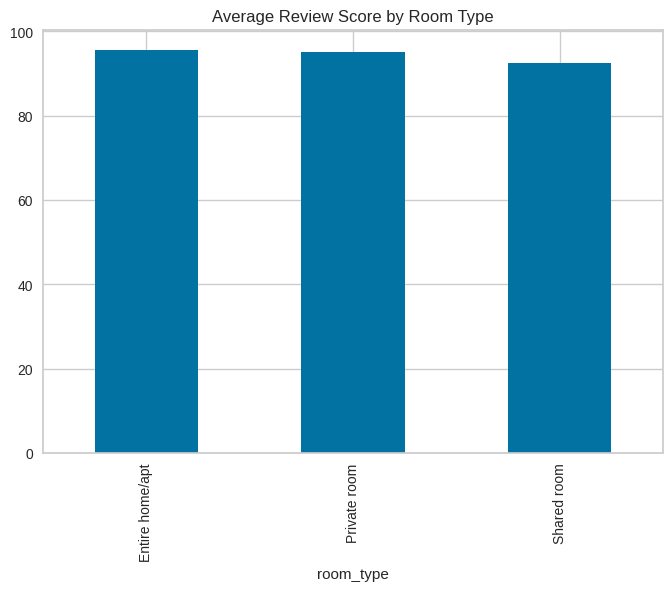

In [ ]:
airbnb.groupby('room_type')['review_scores_rating'].mean().plot(kind='bar')
plt.title('Average Review Score by Room Type')
plt.show()

In [ ]:
airbnb.groupby('room_type')['review_scores_rating'].mean()

room_type
Entire home/apt    95.617037
Private room       95.164857
Shared room        92.605263
Name: review_scores_rating, dtype: float64

# Property Type

In [ ]:
airbnb.groupby('property_type')['review_scores_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,1135.0,94.607048,8.466280,20.0,92.00,97.0,100.00,100.0
Bed & Breakfast,20.0,96.450000,5.968999,80.0,95.75,98.5,100.00,100.0
Boat,1.0,98.000000,NaN,98.0,98.00,98.0,98.00,98.0
Bungalow,10.0,98.800000,2.299758,93.0,98.50,100.0,100.00,100.0
Cabin,15.0,90.000000,13.773681,50.0,88.00,95.0,98.00,100.0
Camper/RV,27.0,96.407407,8.762943,54.0,96.00,99.0,100.00,100.0
Chalet,1.0,100.000000,NaN,100.0,100.00,100.0,100.00,100.0
Condominium,66.0,96.515152,5.227862,80.0,95.25,100.0,100.00,100.0
Earth House,2.0,93.000000,8.485281,87.0,90.00,93.0,96.00,99.0


# Compare Houses to Apartments



---
Which property type is better to invest in?

Which property type is more likely to stay booked?


In [ ]:
hva = airbnb.copy()

In [ ]:
invalid_index = hva[(hva['property_type'].isin(['Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Chalet', 'Condominium', 'Earth House', 'Bed & Breakfast', 'Hut', 'Loft', 'Other', 'Tent', 'Tipi', 'Townhouse', 'Treehouse', 'Villa']))].index
hva.drop(invalid_index, inplace=True)
hva.reset_index(drop=True, inplace=True)


In [ ]:
hva['property_type'] = hva['property_type'].astype(str)  # Convert to string type
hva['property_type'].value_counts()

House        3550
Apartment    1855
Name: property_type, dtype: int64

In [ ]:
hva.groupby('property_type')['booked'].value_counts(normalize=True)

property_type  booked
Apartment      False     0.612938
               True      0.387062
House          False     0.730423
               True      0.269577
Name: booked, dtype: float64

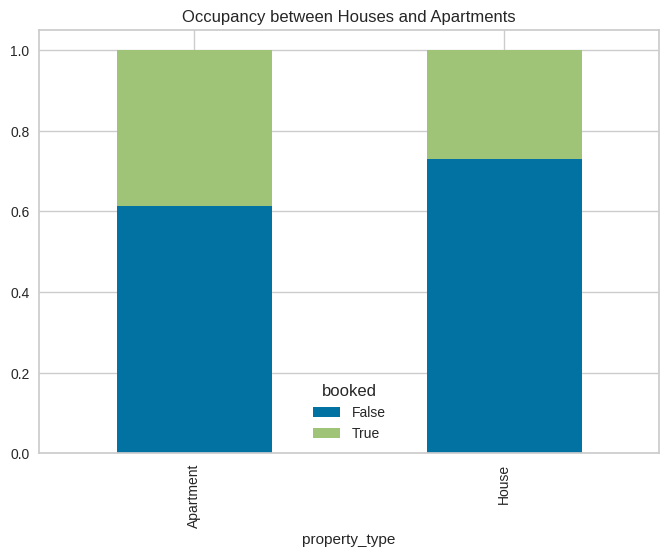

In [ ]:
hva_plot = hva.groupby('property_type')['booked'].value_counts(normalize=True).unstack().reset_index()
hva_plot.set_index('property_type', inplace=True)
hva_plot.plot(kind='bar', stacked=True)
plt.title('Occupancy between Houses and Apartments')
plt.show()

# Cancellation Policy

In [ ]:
airbnb['cancellation_policy'].value_counts()

strict             2344
flexible           2161
moderate           1320
super_strict_30       9
no_refunds            1
Name: cancellation_policy, dtype: int64

<Axes: xlabel='cancellation_policy'>

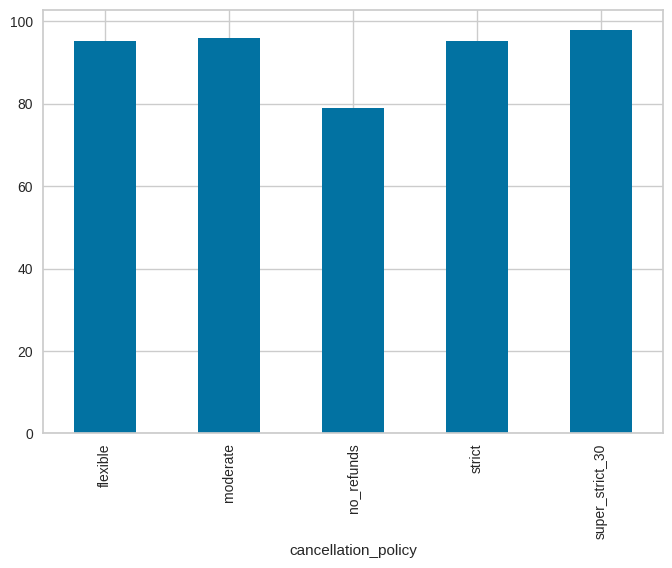

In [ ]:
airbnb.groupby('cancellation_policy')['review_scores_rating'].mean().plot(kind='bar')

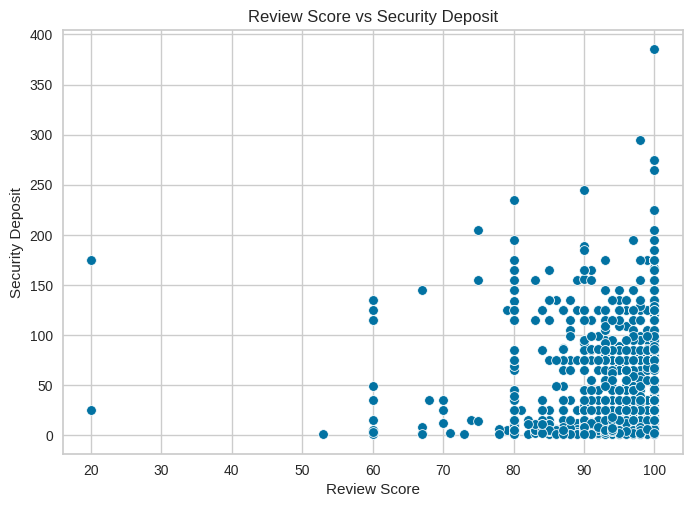

In [ ]:
sns.scatterplot(data = airbnb, y = 'cleaning_fee', x = 'review_scores_rating')
plt.title('Review Score vs Security Deposit')
plt.xlabel('Review Score')
plt.ylabel('Security Deposit')
plt.show()

# Logistic Regression to see if any review categories have an affect on 'Booked'

In [ ]:
review_df['booked'] = review_df['booked'].apply(lambda x: 1 if x==True else 0)
review_df['booked'] = review_df['booked'].astype('category')

In [ ]:
review_df['security_deposit'].fillna(0, inplace=True)
review_df['cleaning_fee'].fillna(0, inplace=True)
review_df['review_scores_accuracy'].fillna(review_df['review_scores_accuracy'].mean(), inplace=True)
review_df['review_scores_cleanliness'].fillna(review_df['review_scores_cleanliness'].mean(), inplace=True)
review_df['review_scores_checkin'].fillna(review_df['review_scores_checkin'].mean(), inplace=True)
review_df['review_scores_communication'].fillna(review_df['review_scores_communication'].mean(), inplace=True)
review_df['review_scores_location'].fillna(review_df['review_scores_location'].mean(), inplace=True)
review_df['review_scores_value'].fillna(review_df['review_scores_value'].mean(), inplace=True)

In [ ]:
# split the data into training and testing sets
X = review_df.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X=review_df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

y = review_df['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 4628 to 4797
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         2652 non-null   float64
 1   review_scores_accuracy       2652 non-null   float64
 2   review_scores_cleanliness    2652 non-null   float64
 3   review_scores_checkin        2652 non-null   float64
 4   review_scores_communication  2652 non-null   float64
 5   review_scores_location       2652 non-null   float64
 6   review_scores_value          2652 non-null   float64
dtypes: float64(7)
memory usage: 165.8 KB
<class 'pandas.core.series.Series'>
Int64Index: 2652 entries, 4628 to 4797
Series name: booked
Non-Null Count  Dtype   
--------------  -----   
2652 non-null   category
dtypes: category(1)
memory usage: 23.4 KB


In [ ]:
#Fit stepwise logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y =y_train

logit_step = sm.Logit(y, X).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.570883
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:                 2652
Model:                          Logit   Df Residuals:                     2644
Method:                           MLE   Df Model:                            7
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                0.002748
Time:                        01:55:20   Log-Likelihood:                -1514.0
converged:                       True   LL-Null:                       -1518.2
Covariance Type:            nonrobust   LLR p-value:                    0.3033
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8860      0.955     -1.974      0.048   

## it seems that none of the review categories have an effect on the booked status of an airbnb

# What factors contribute to keeping a property booked?


---

Booked will be defined as less than 40% availability for next 90 Days

Previously in the code, we created 2 columns to help track 'booked'.

First, we divided the availability in the next 90 days by 90 to get the availability expressed as a percentage.

Then, we assigned properties with an availability percentage below 40% with 1 (indicating property is 'booked') and properties with percentages at or above 40% with 0.


In [ ]:
df = airbnb.drop(columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   host_is_superhost       5835 non-null   bool    
 1   host_listings_count     5835 non-null   float64 
 2   host_has_profile_pic    5835 non-null   bool    
 3   host_identity_verified  5835 non-null   bool    
 4   property_type           5835 non-null   category
 5   room_type               5835 non-null   category
 6   accommodates            5835 non-null   int64   
 7   bathrooms               5835 non-null   float64 
 8   bedrooms                5835 non-null   float64 
 9   beds                    5835 non-null   float64 
 10  bed_type                5835 non-null   category
 11  amenities               5835 non-null   object  
 12  price                   5835 non-null   float64 
 13  security_deposit        2770 non-null   float64 
 14  cleaning_fee            

In [ ]:
df['booked'] = df['booked'].apply(lambda x: 1 if x==True else 0)
df['booked'] = df['booked'].astype('category')

In [ ]:
df['security_deposit'].fillna(0, inplace=True)
df['cleaning_fee'].fillna(0, inplace=True)

In [ ]:
df.head()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,cancellation_policy,availability_90_pct,booked,filled,mostly_filled
0,False,1.0,True,False,House,Private room,6,2.5,1.0,3.0,...,0,0,0,240,1,moderate,0.000000,1,7,1
1,False,1.0,True,True,Camper/RV,Private room,2,0.0,1.0,1.0,...,29,59,89,364,0,moderate,0.988889,0,7,1
2,False,2.0,True,True,House,Private room,2,1.5,1.0,1.0,...,30,60,90,365,0,flexible,1.000000,0,4,0
3,False,2.0,True,True,House,Private room,2,1.5,1.0,1.0,...,30,60,90,365,0,flexible,1.000000,0,4,0
4,False,301.0,True,True,House,Entire home/apt,6,2.0,3.0,3.0,...,27,57,87,358,0,strict,0.966667,0,5,1


In [ ]:
# split the data into training and testing sets
X = df.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['host_is_superhost', 'property_type', 'room_type', 'accommodates','bathrooms','bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'cancellation_policy', 'mostly_filled']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['property_type', 'room_type','bed_type','cancellation_policy',], drop_first=True)

y = df['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_is_superhost                    4084 non-null   bool   
 1   accommodates                         4084 non-null   int64  
 2   bathrooms                            4084 non-null   float64
 3   bedrooms                             4084 non-null   float64
 4   beds                                 4084 non-null   float64
 5   price                                4084 non-null   float64
 6   security_deposit                     4084 non-null   float64
 7   cleaning_fee                         4084 non-null   float64
 8   guests_included                      4084 non-null   int64  
 9   extra_people                         4084 non-null   float64
 10  minimum_nights                       4084 non-null   int64  
 11  number_of_reviews           

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_is_superhost                    5835 non-null   bool   
 1   accommodates                         5835 non-null   int64  
 2   bathrooms                            5835 non-null   float64
 3   bedrooms                             5835 non-null   float64
 4   beds                                 5835 non-null   float64
 5   price                                5835 non-null   float64
 6   security_deposit                     5835 non-null   float64
 7   cleaning_fee                         5835 non-null   float64
 8   guests_included                      5835 non-null   int64  
 9   extra_people                         5835 non-null   float64
 10  minimum_nights                       5835 non-null   int64  
 11  number_of_reviews             

# Run Stepwise Selection

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.05,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [ ]:
selected_features  = stepwise_selection(X.astype('float'), y)
print('resulting features:')
print(selected_features)

Add  number_of_reviews with p-value 0.0000
Add  property_type_House with p-value 0.0000
Add  room_type_Private room with p-value 0.0000
Add  cancellation_policy_strict with p-value 0.0000
Add  cleaning_fee with p-value 0.0000
Add  room_type_Shared room with p-value 0.0000
Add  guests_included with p-value 0.0000
Add  cancellation_policy_moderate with p-value 0.0019
Add  accommodates with p-value 0.0028
Add  property_type_Bed & Breakfast with p-value 0.0042
Add  bedrooms with p-value 0.0151
Add  property_type_Camper/RV with p-value 0.0161
Add  property_type_Treehouse with p-value 0.0238
Add  extra_people with p-value 0.0380
Drop guests_included with p-value 0.1295
resulting features:
['number_of_reviews', 'property_type_House', 'room_type_Private room', 'cancellation_policy_strict', 'cleaning_fee', 'room_type_Shared room', 'cancellation_policy_moderate', 'accommodates', 'property_type_Bed & Breakfast', 'bedrooms', 'property_type_Camper/RV', 'property_type_Treehouse', 'extra_people']


In [ ]:
# split the data into training and testing sets
# X = df.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X=X[['number_of_reviews', 'property_type_House', 'room_type_Private room', 'cancellation_policy_strict', 'cleaning_fee', 'room_type_Shared room', 'cancellation_policy_moderate', 'accommodates', 'property_type_Bed & Breakfast', 'bedrooms', 'property_type_Camper/RV', 'extra_people']]
#Create dummy variables for nominal inputs
# X = pd.get_dummies(X, columns=['room_type',], drop_first=True)

y = df['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_reviews              4084 non-null   int64  
 1   property_type_House            4084 non-null   uint8  
 2   room_type_Private room         4084 non-null   uint8  
 3   cancellation_policy_strict     4084 non-null   uint8  
 4   cleaning_fee                   4084 non-null   float64
 5   room_type_Shared room          4084 non-null   uint8  
 6   cancellation_policy_moderate   4084 non-null   uint8  
 7   accommodates                   4084 non-null   int64  
 8   property_type_Bed & Breakfast  4084 non-null   uint8  
 9   bedrooms                       4084 non-null   float64
 10  property_type_Camper/RV        4084 non-null   uint8  
 11  extra_people                   4084 non-null   float64
dtypes: float64(3), int64(2), uint8(7)
memory usage

In [ ]:
X.columns

Index(['number_of_reviews', 'property_type_House', 'room_type_Private room',
       'cancellation_policy_strict', 'cleaning_fee', 'room_type_Shared room',
       'cancellation_policy_moderate', 'accommodates',
       'property_type_Bed & Breakfast', 'bedrooms', 'property_type_Camper/RV',
       'extra_people'],
      dtype='object')

In [ ]:
#Fit stepwise logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y =y_train

logit_step = sm.Logit(y, X).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.587440
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 booked   No. Observations:                 4084
Model:                          Logit   Df Residuals:                     4071
Method:                           MLE   Df Model:                           12
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                 0.04468
Time:                        01:55:50   Log-Likelihood:                -2399.1
converged:                       True   LL-Null:                       -2511.3
Covariance Type:            nonrobust   LLR p-value:                 2.858e-41
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.1263      0.099      1.271      0.

In [ ]:
# Generate predicted values for training set
pprob = logit_step.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_step.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   number_of_reviews              4084 non-null   int64   
 1   property_type_House            4084 non-null   uint8   
 2   room_type_Private room         4084 non-null   uint8   
 3   cancellation_policy_strict     4084 non-null   uint8   
 4   cleaning_fee                   4084 non-null   float64 
 5   room_type_Shared room          4084 non-null   uint8   
 6   cancellation_policy_moderate   4084 non-null   uint8   
 7   accommodates                   4084 non-null   int64   
 8   property_type_Bed & Breakfast  4084 non-null   uint8   
 9   bedrooms                       4084 non-null   float64 
 10  property_type_Camper/RV        4084 non-null   uint8   
 11  extra_people                   4084 non-null   float64 
 12  p_success                      4

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.6988
Precision (Train): 0.5472
Recall (Train)  : 0.0699

Accuracy (Test) : 0.6893
Precision (Test): 0.5476
Recall (Test)  : 0.0833



In [ ]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[2767 1158]
 [  72   87]]
[[1161  506]
 [  38   46]]


## How do you choose only category of a dummy variable?

Either include full variable or create new column

# L1 Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
# split the data into training and testing sets
X = airbnb.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['host_is_superhost', 'property_type', 'room_type', 'accommodates','bathrooms','bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'number_of_reviews', 'cancellation_policy', 'mostly_filled']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['property_type', 'room_type','bed_type','cancellation_policy',], drop_first=True)

y = df['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_is_superhost                    4084 non-null   bool   
 1   accommodates                         4084 non-null   int64  
 2   bathrooms                            4084 non-null   float64
 3   bedrooms                             4084 non-null   float64
 4   beds                                 4084 non-null   float64
 5   price                                4084 non-null   float64
 6   security_deposit                     4084 non-null   float64
 7   cleaning_fee                         4084 non-null   float64
 8   guests_included                      4084 non-null   int64  
 9   extra_people                         4084 non-null   float64
 10  minimum_nights                       4084 non-null   int64  
 11  number_of_reviews           

In [ ]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X_train, y_train)
lr_l1_01.fit(X_train, y_train)



LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients
print('--------L1, C = 0.1--------')
df_coefficients1 = rpt_model_variables(lr_l1_1)
print('--------L1, C = 0.01--------')
df_coefficients01 = rpt_model_variables(lr_l1_01)

--------L1, C = 0.1--------
                                feature  coefficient  abs_coefficient
30               room_type_Private room      -0.6057           0.6057
31                room_type_Shared room      -0.3610           0.3610
21                  property_type_House      -0.2970           0.2970
38           cancellation_policy_strict      -0.2134           0.2134
36         cancellation_policy_moderate      -0.0981           0.0981
2                             bathrooms       0.0603           0.0603
4                                  beds      -0.0501           0.0501
8                       guests_included      -0.0357           0.0357
3                              bedrooms       0.0312           0.0312
1                          accommodates      -0.0293           0.0293
0                     host_is_superhost      -0.0219           0.0219
11                    number_of_reviews      -0.0137           0.0137
10                       minimum_nights      -0.0051          

## Make Predictions

In [ ]:
# make predictions on the testing data

# L1 C=0.1
y_pred_train = lr_l1_1.predict(X_train)
y_pred_test = lr_l1_1.predict(X_test)
y_proba_train = lr_l1_1.predict_proba(X_train)
y_proba_test = lr_l1_1.predict_proba(X_test)

# L1 C=0.01
y_pred_train1 = lr_l1_01.predict(X_train)
y_pred_test1 = lr_l1_01.predict(X_test)
y_proba_train1 = lr_l1_01.predict_proba(X_train)
y_proba_test1 = lr_l1_01.predict_proba(X_test)



### L1 C=0.1 Model

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y_train, y_pred_train)
prec3_train = precision_score(y_train, y_pred_train)
rec3_train = recall_score(y_train, y_pred_train)
auc3_train = roc_auc_score(y_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y_test, y_pred_test)
prec3_test = precision_score(y_test, y_pred_test)
rec3_test = recall_score(y_test, y_pred_test)
auc3_test = roc_auc_score(y_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.6949
Precision: 0.4545
Recall.  : 0.0040
AUC      : 0.6475

 -- test set -- 
Accuracy : 0.6848
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6459


### L1 C=0.01 Model

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y_train, y_pred_train1)
prec3_train1 = precision_score(y_train, y_pred_train1)
rec3_train1 = recall_score(y_train, y_pred_train1)
auc3_train1 = roc_auc_score(y_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y_test, y_pred_test1)
prec3_test1 = precision_score(y_test, y_pred_test1)
rec3_test1 = recall_score(y_test, y_pred_test1)
auc3_test1 = roc_auc_score(y_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.6952
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6323

 -- test set -- 
Accuracy : 0.6848
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6434


## Decision Tree

In [ ]:
# split the data into training and testing sets
X = airbnb.drop(['booked'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['host_is_superhost', 'property_type', 'room_type', 'accommodates','bathrooms','bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'cancellation_policy', 'mostly_filled']]
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['property_type', 'room_type','bed_type','cancellation_policy',], drop_first=True)

y = df['booked']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   host_is_superhost                    4084 non-null   bool   
 1   accommodates                         4084 non-null   int64  
 2   bathrooms                            4084 non-null   float64
 3   bedrooms                             4084 non-null   float64
 4   beds                                 4084 non-null   float64
 5   price                                4084 non-null   float64
 6   security_deposit                     4084 non-null   float64
 7   cleaning_fee                         4084 non-null   float64
 8   guests_included                      4084 non-null   int64  
 9   extra_people                         4084 non-null   float64
 10  minimum_nights                       4084 non-null   int64  
 11  mostly_filled               

In [ ]:
dt_tune = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0.01, 'max_depth': None, 'min_samples_leaf': 1}
DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)


# Using the Grid Search Parameters caused the tree to be overtuned

### Decided to use below parameters instead

In [ ]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=25)

# fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree_final")

'decision_tree_final.pdf'

In [ ]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

In [ ]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.7245
Precision: 0.6224
Recall.  : 0.2450

 -- test set -- 
Accuracy : 0.6733
Precision: 0.4550
Recall.  : 0.1830


# Feature Importance

### Our initial tree had 'number of reviews' as the most important feature and listings having less than 4 reviews had a higher concentration of 'booked' on the tree. We decided to remove this variable as it did not make much sense from a business perspective.

Top 10 Important Variables
    importance                 feature
5     0.233557                   price
7     0.148174            cleaning_fee
6     0.096401        security_deposit
20    0.095382     property_type_House
9     0.071592            extra_people
1     0.052212            accommodates
2     0.043495               bathrooms
0     0.043347       host_is_superhost
29    0.036151  room_type_Private room
10    0.034760          minimum_nights


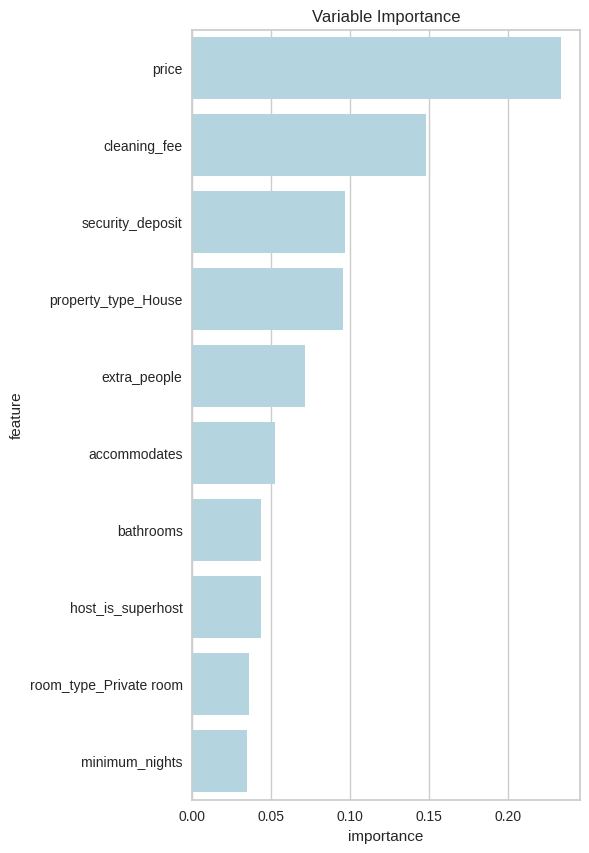

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df1 = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df1['feature']=X.columns

#sort data so features with largest importance values are at the top
df1 = df1.sort_values(by=['importance'], ascending=False)
print('Top 10 Important Variables')
df1=df1.head(10)
print(df1)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df1,
            y=df1['feature'],
            x=df1['importance'], color="lightblue")

plt.show()

# Convert Notebook to html

In [ ]:
## Convert notebook to HTML
%%shell
jupyter nbconvert '/content/drive/MyDrive/6025 - Final Project/Final_Project_Code_Q2Q3.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/6025 - Final Project/Final_Project_Code_Q2Q3.ipynb to html
[NbConvertApp] Writing 1517671 bytes to /content/drive/MyDrive/6025 - Final Project/Final_Project_Code_Q2Q3.html
